# 1. 데이터 수집 - 한 페이지 크롤링

## 1)다나와 검색 페이지 접속

크롬 드라이브 다운받기
- 크롬 브라우저를 제어하기 위한 드라이버
- 크롬 외에도 IE, 파이어폭스등 다양한 브라우저도 가능
- 자신의 크롬버전 및 운영체제와 동일한 드라이버를 다운로드

In [52]:
# selenium으로 '다나와 검색 결과 url'에 접속
from selenium import webdriver
driver = webdriver.Chrome('C:/Users/thwjd/Documents/chromedriver.exe')
url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&module=goods&act=dispMain'
driver.get(url)

<ipython-input-52-e9ab48089937>:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/Users/thwjd/Documents/chromedriver.exe')


로걸 경로 주소를 그대로 복사붙여 넣기를 하면 errpr가 발생한다.    

```
SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape

```
    
경로의 `\`를 `/`로 바꿔서 수정하면 해결된다!

코드가 실행되면 '무선청소기'가 검색된 다나와 페이지가 팝업된다.

## 1) 다나와 검색 웹페이지에서 상품 정보 가져오기

In [4]:
from bs4 import BeautifulSoup

# 웹 페이지의 HTML 정보 가져오기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# url 페이지에 대한 무선청소기 정보 가져오기
prod_items = soup.select('li.prod_item')
len(prod_items)

44

In [10]:
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

44

In [11]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

44

In [18]:
# 상품명 정보 가져오기
type(prod_items)

bs4.element.ResultSet

In [16]:
prod_items[0]

<li class="prod_item" id="productItem14574131">
<input id="productItem_categoryInfo_14574131" type="hidden" value="자동차 용품_차량용전자제품"/>
<input id="min_price_14574131" type="hidden" value="46010"/>
<div class="prod_main_info">
<div class="thumb_image">
<a class="thumb_link click_log_product_standard_img_" href="http://prod.danawa.com/info/?pcode=14574131&amp;keyword=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&amp;cate=14237761" id="thumbLink_14574131" onmousedown="_trkEventLog('통합검색_상품블로그_유입');" target="_blank">
<img alt="차량용 청소기 A3 (해외구매)" onerror="this.onerror=null; this.src='//img.danawa.com/new/noData/img/noImg_160.gif';" src="//img.danawa.com/prod_img/500000/131/574/img/14574131_1.jpg?shrink=130:130&amp;_v=20220506174617"/>
</a>
<a class="btn_view_zoom" data-assemblygallerycategory="N" href="#" id="imageZoom_14574131" onclick="return false;">
<span class="ico i_zoom_vw"></span>이미지보기
							</a>
<input id="hidden_cate_sub_c1" type="hidden" value="1840"/>
<input id="hidden_cate_sub_c2

In [17]:
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

베이스어스 차량용 청소기 A3 (해외구매)


In [21]:
# 상품 스펙 목록 정보 가져오기
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

차량용청소기 / 																				무선
								 / 흡입력: 																				15,000Pa
								 / 최대출력: 135W / 헤파필터 / 추가노즐: 																				틈새
								, 																				솔브러쉬
								 / LED라이트 / 사용시간: 																				45분
								 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm


In [28]:
spec_tmp = prod_items[0].select('div.spec_list')[0].text
print(spec_tmp)


								차량용청소기 / 																				무선
								 / 흡입력: 																				15,000Pa
								 / 최대출력: 135W / 헤파필터 / 추가노즐: 																				틈새
								, 																				솔브러쉬
								 / LED라이트 / 사용시간: 																				45분
								 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm								


`.strip()`는 문장의 앞 뒤의 공백을 제거해 준다.

In [22]:
spec_list = spec_list.replace('\t', '').replace('\n', '')
print(spec_list)

차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm


In [24]:
# 가격 정보 가져오기
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace('\t', '').replace('\n', '')
print(price)

46,010


In [32]:
# 반복문으로 검색 결과의 1페이지에 대한 상품 정보 추출
prod_data = []

for prod_item in prod_items:
    if 'product-pot' in prod_item['class']:
        continue
    try : 
        # 1. 상품명 가져오기
        title = prod_item.select('p.prod_name > a')[0].text.strip()
        
        # 2. 상품 스펙 목록 가져오기
        spec_list = prod_item.select('div.spec_list')[0].text.replace('\t', '').replace('\n', '')
        
        # 3. 가격 정보 가져오기
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace('\t', '').replace('\n', '')
        
        prod_data.append([title, spec_list, price])
    except:
        pass # error 발생시 넘어가기 (ex. 광고성 제품)

print(len(prod_data))
print(prod_data)

40
[['베이스어스 차량용 청소기 A3 (해외구매)', '차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / LED라이트 / 사용시간: 45분 / 배터리 잔량표시 / 소음: 75dB / 충전방식: USB C타입 / 충전시간: 3~5시간 / 색상: 블랙, 실버 / 크기: 296x56.5mm', '46,010'], ['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571', '핸디/스틱청소기 / 무선형 / 흡입+걸레겸용 / 흡입력: 210W / [배터리] 분리형 (2개) / 충전시간: 4시간 / 사용시간(개당): 1시간 / [성능] 스마트인버터모터 / 분리형배기필터 / 헤파필터 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm', '963,540'], ['LG전자 오브제컬렉션 코드제로 ThinQ A9S AT9201WC', '핸디/스틱청소기 / 무선형 / 흡입+걸레겸용 / 흡입력: 210W / [배터리] 분리형 (1개) / 충전시간: 4시간 / 사용시간(개당): 1시간 / [성능] 스마트인버터모터 / 분리형배기필터 / 헤파필터 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm', '682,950'], ['샤오미 드리미 V11 SE', '핸디/스틱청소기 / 무선형 / 흡입전용 / 흡입력: 150AW / 흡입력: 24000Pa / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / [성능] 5단계여과 / [기능] 배터리잔량표시 / [구성] 바닥 / 침구 / 솔형 / 틈새 / 연장툴

In [36]:
# 함수로 만들기
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        if 'product-pot' in prod_item['class']:
            continue
        try : 
            # 1. 상품명 가져오기
            title = prod_item.select('p.prod_name > a')[0].text.strip()

            # 2. 상품 스펙 목록 가져오기
            spec_list = prod_item.select('div.spec_list')[0].text.replace('\t', '').replace('\n', '')

            # 3. 가격 정보 가져오기
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace('\t', '').replace('\n', '')

            prod_data.append([title, spec_list, price])
        except:
            pass # error 발생시 넘어가기 (ex. 광고성 제품)
    return prod_data   

In [37]:
# 함수 테스트
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

40


# 2. 데이터 수집2 - 여러 페이지 크롤링

## 1) 다나와 검색 결과 페이지 url 분석

In [38]:
# 다나와 검색 url을 만들어주는 함수
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=14237761&defaultPhysicsCategoryCode=1840%7C59152%7C59189%7C0&defaultVmTab=2944&defaultVaTab=417205&tab=goods'.format(keyword, page)

In [41]:
keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=14237761&defaultPhysicsCategoryCode=1840%7C59152%7C59189%7C0&defaultVmTab=2944&defaultVaTab=417205&tab=goods


In [ ]:
# 브라우저 종료
driver.quit()

## 2) 주피터 노트북의 진행표시줄 처리

In [42]:
# tqdm 라이브러리 설치
!pip install tqdm

In [43]:
# tqdm 사용방법
import time
from tqdm import tqdm_notebook
total_page = 10
for page in tqdm_notebook(range(1, total_page+1)):
    # 일정 시간 프로세스 일시 정지하기 -> 여기서는 5초를 주었다.
    time.sleep(5)

<ipython-input-43-3af99a3abb83>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

## 3) 여러 페이지에 걸친 상품 정보 수집

In [ ]:
# driver 새로 시작
driver = webdriver.Chrome('C:/Users/thwjd/Documents/chromedriver.exe')

In [53]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

In [54]:
keyword = '무선청소기'
total_page = 5
prod_data_total = []

In [55]:
for page in tqdm_notebook(range(1, total_page+1)):
    # 1. 검색 페이지 이동
    url = get_search_page_url(keyword, page)
    driver.get(url) # URL에 접근하는 메소드
    
    # 2.페이지 로딩 완료 시간으로 5초를 할당
    time.sleep(5)
    
    # 3. 현재 페이지의 html 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # 4. 상품 정보 추출
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # 5. 추출 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-55-625b437ea44b>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/5 [00:00<?, ?it/s]

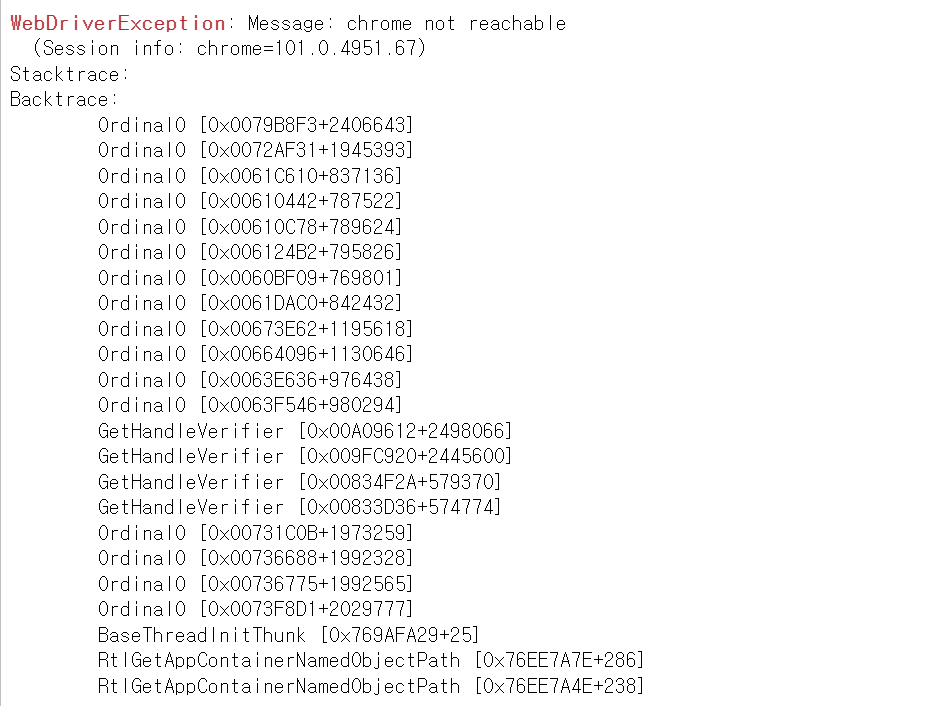

drive.get(url)에서 위 같은 에러가 뜬다면`drive.quit()`로 브라우저를 종료하고 나서 다시 하면 정상적으로 작동한다.

## 4) 수집 데이터 저장

In [56]:
import pandas as pd

data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('./danawa_crawling_result_1.xlsx', index=False)

# 3. 다나와 크롤링 데이터 전처리

## 1) 크롤링 데이터 불러오기

In [59]:
data = pd.read_excel('./danawa_crawling_result_1.xlsx')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     200 non-null    object
 1   스펙 목록   200 non-null    object
 2   가격      200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [61]:
data.head()

,상품명,스펙 목록,가격
0,베이스어스 차량용 청소기 A3 (해외구매),"차량용청소기 / 무선 / 흡입력: 15,000Pa / 최대출력: 135W / 헤파필...","46,010"
1,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 무선형 / 흡입+걸레겸용 / 흡입력: 210W / [배터리] 분...,"963,420"
2,LG전자 오브제컬렉션 코드제로 ThinQ A9S AT9201WC,핸디/스틱청소기 / 무선형 / 흡입+걸레겸용 / 흡입력: 210W / [배터리] 분...,"682,900"
3,샤오미 드리미 V11 SE,핸디/스틱청소기 / 무선형 / 흡입전용 / 흡입력: 150AW / 흡입력: 2400...,"162,320"
4,샤오미 LYDSTO 차량용 무선 청소기 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,000Pa / 최대출력: 120W / 헤파필...","34,320"


## 2) 회사명, 모델명 정리

In [62]:
company_list = []
product_list = []

for titme in data['상품명']:
    title_info = title.split(' ', 1) # (구분자, 분할 횟수)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [63]:
company_list

['다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
 '다이슨',
